In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../../data/formatted/ZHVI/ZHVI_April24_Formatted.csv', dtype=str)

In [3]:
df['ZHVI'] = df['ZHVI'].astype(float)
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df

,Date,ZHVI,ZipCode,SizeRank,State,City,Metro,CountyName
0,2000-01-31,213463.221766,77494,1,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County
1,2000-02-29,213648.488561,77494,1,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County
2,2000-03-31,214143.543595,77494,1,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County
3,2000-04-30,215143.447856,77494,1,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County
4,2000-05-31,215179.214262,77494,1,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County
...,...,...,...,...,...,...,...,...
7693611,2023-12-31,196271.147913,50160,39992,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County
7693612,2024-01-31,197149.510562,50160,39992,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County
7693613,2024-02-29,197990.458089,50160,39992,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County
7693614,2024-03-31,199040.412876,50160,39992,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County


In [5]:
df[['SizeRank','City']].drop_duplicates().head(20)

,SizeRank,City
0,1,Katy
292,2,Lakewood
584,3,Katy
876,4,New York
1168,5,Houston
1460,6,El Paso
1752,7,New York
2044,8,Pflugerville
2336,9,New York
2628,10,Los Angeles


In [6]:
# number of nan values
# before 2023 update there were 1,840,040 missing values
# before may update there were 2,068,921
df[df['ZHVI'].isna()]

,Date,ZHVI,ZipCode,SizeRank,State,City,Metro,CountyName
4408,2002-05-31,NaN,11236,16,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County
4992,2002-05-31,NaN,11373,18,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County
5284,2002-05-31,NaN,11226,19,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County
5285,2002-06-30,NaN,11226,19,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County
7008,2000-01-31,NaN,77573,25,TX,League City,"Houston-The Woodlands-Sugar Land, TX",Galveston County
...,...,...,...,...,...,...,...,...
7693548,2018-09-30,NaN,50160,39992,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County
7693549,2018-10-31,NaN,50160,39992,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County
7693550,2018-11-30,NaN,50160,39992,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County
7693551,2018-12-31,NaN,50160,39992,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County


In [7]:
import matplotlib.pyplot as plt

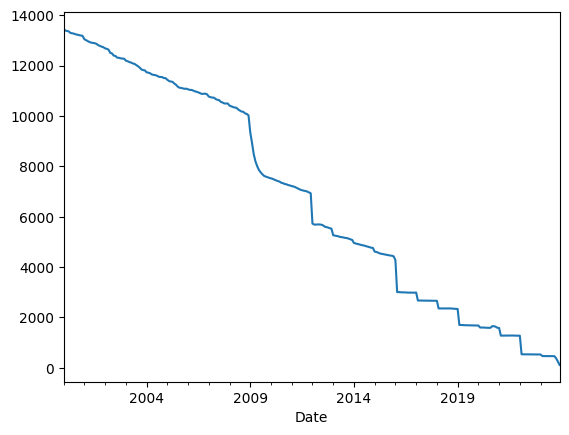

In [8]:
# before 2023 there were more spikes in this graph (ie 2020)
df[df['ZHVI'].isna()].groupby('Date')['ZipCode'].count().plot();

In [9]:
df['isNan'] = df['ZHVI'].isna().astype(int)

In [11]:
def count_conseq(x):
  return (x * (x.groupby((x != x.shift()).cumsum()).cumcount() + 1))

In [12]:
df['conseqNan'] = df.groupby('ZipCode')['isNan'].transform(count_conseq)

In [13]:
df

,Date,ZHVI,ZipCode,SizeRank,State,City,Metro,CountyName,isNan,conseqNan
0,2000-01-31,213463.221766,77494,1,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,0,0
1,2000-02-29,213648.488561,77494,1,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,0,0
2,2000-03-31,214143.543595,77494,1,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,0,0
3,2000-04-30,215143.447856,77494,1,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,0,0
4,2000-05-31,215179.214262,77494,1,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,0,0
...,...,...,...,...,...,...,...,...,...,...
7693611,2023-12-31,196271.147913,50160,39992,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County,0,0
7693612,2024-01-31,197149.510562,50160,39992,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County,0,0
7693613,2024-02-29,197990.458089,50160,39992,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County,0,0
7693614,2024-03-31,199040.412876,50160,39992,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County,0,0


In [14]:
df[df['ZipCode'] == '54748']

,Date,ZHVI,ZipCode,SizeRank,State,City,Metro,CountyName,isNan,conseqNan
5756488,2000-01-31,NaN,54748,20297,WI,Jim Falls,"Eau Claire, WI",Chippewa County,1,1
5756489,2000-02-29,NaN,54748,20297,WI,Jim Falls,"Eau Claire, WI",Chippewa County,1,2
5756490,2000-03-31,NaN,54748,20297,WI,Jim Falls,"Eau Claire, WI",Chippewa County,1,3
5756491,2000-04-30,NaN,54748,20297,WI,Jim Falls,"Eau Claire, WI",Chippewa County,1,4
5756492,2000-05-31,NaN,54748,20297,WI,Jim Falls,"Eau Claire, WI",Chippewa County,1,5
...,...,...,...,...,...,...,...,...,...,...
5756775,2023-12-31,312429.270904,54748,20297,WI,Jim Falls,"Eau Claire, WI",Chippewa County,0,0
5756776,2024-01-31,313133.476466,54748,20297,WI,Jim Falls,"Eau Claire, WI",Chippewa County,0,0
5756777,2024-02-29,314744.709616,54748,20297,WI,Jim Falls,"Eau Claire, WI",Chippewa County,0,0
5756778,2024-03-31,318177.784336,54748,20297,WI,Jim Falls,"Eau Claire, WI",Chippewa County,0,0


In [15]:
max_conseq_missing = df.groupby('ZipCode')['conseqNan'].max()

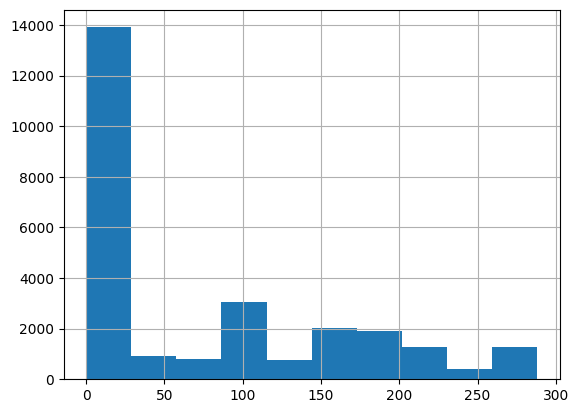

In [16]:
max_conseq_missing.hist();

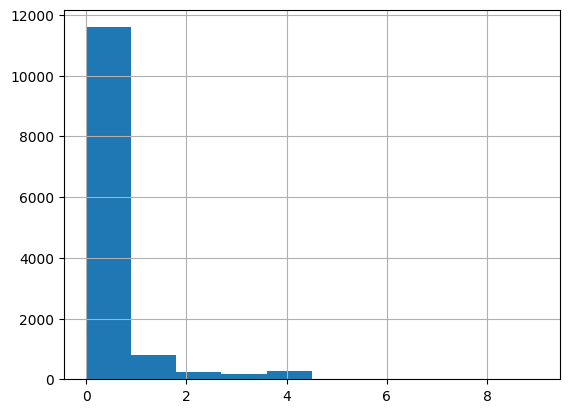

In [17]:
max_conseq_missing[max_conseq_missing < 10].hist();

In [18]:
len(max_conseq_missing[max_conseq_missing < 5])

13050

In [19]:
# federal funds rate started rising mid 2004. To capture long range dependencies, the rising rates should be captured in the model
# data from further back in time is less reliable
# try 2004 and on 

df = df[df['Date'] > '2004-01-01']
max_conseq_missing04 = df.groupby('ZipCode')['conseqNan'].max()

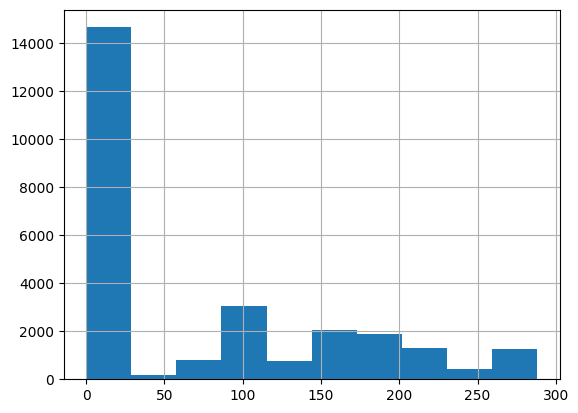

In [20]:
max_conseq_missing04.hist();

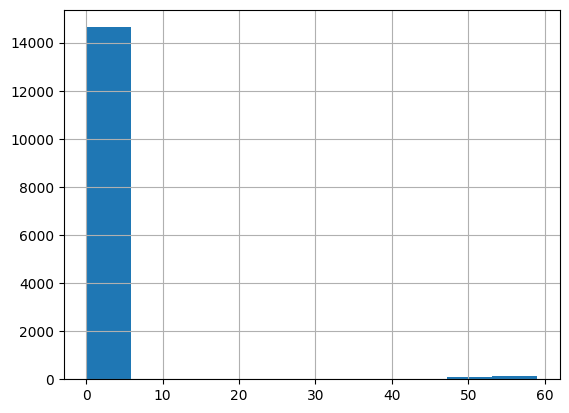

In [21]:
max_conseq_missing04[max_conseq_missing04 < 60].hist();

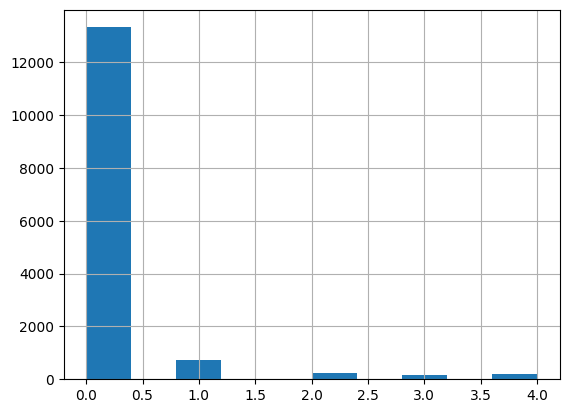

In [22]:
max_conseq_missing04[max_conseq_missing04 < 5].hist();

In [23]:
len(max_conseq_missing04[max_conseq_missing04 < 5])

14630

In [24]:
#only keep zips with less than 5 months of consecutive missing values
zips_to_keep = max_conseq_missing04[max_conseq_missing04 < 5].index.values
df = df[df['ZipCode'].isin(zips_to_keep)]

In [25]:
df[df['ZHVI'].isna()]

,Date,ZHVI,ZipCode,SizeRank,State,City,Metro,CountyName,isNan,conseqNan
11630,2020-03-31,NaN,11220,40,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Kings County,1,1
16022,2021-03-31,NaN,78613,56,TX,Cedar Park,"Austin-Round Rock-Georgetown, TX",Williamson County,1,1
16023,2021-04-30,NaN,78613,56,TX,Cedar Park,"Austin-Round Rock-Georgetown, TX",Williamson County,1,2
20503,2005-04-30,NaN,99301,72,WA,Pasco,"Kennewick-Richland, WA",Franklin County,1,1
24297,2005-02-28,NaN,73099,87,OK,Yukon,"Oklahoma City, OK",Canadian County,1,1
...,...,...,...,...,...,...,...,...,...,...
7663329,2006-10-31,NaN,79366,39992,TX,Ransom Canyon,"Lubbock, TX",Lubbock County,1,2
7663330,2006-11-30,NaN,79366,39992,TX,Ransom Canyon,"Lubbock, TX",Lubbock County,1,3
7663331,2006-12-31,NaN,79366,39992,TX,Ransom Canyon,"Lubbock, TX",Lubbock County,1,4
7679421,2009-06-30,NaN,47282,39992,IN,Vernon,"North Vernon, IN",Jennings County,1,1


In [26]:
df['ZipCode'].nunique()

14630

In [27]:
df['Date'].nunique()

244

In [30]:
# expected total number of entries is equal to actual number of entries
#244 * 14630
df['Date'].nunique() * df['ZipCode'].nunique()

3569720

In [33]:
df['Date'].count()

3569720

In [34]:
df['ZHVI'] = df['ZHVI'].round()

In [35]:
df = df.drop(['isNan', 'conseqNan'], axis=1)

In [36]:
df.to_csv('../../data/processed/ZHVI/ZHVI_April24_Processed.csv', index= False)

## Interpolation (testing only)

In [ ]:
'''
maximizing data points

previous approach: 12 years * 12 months * 23969 = ~ 3.4 million

current approach: 273 * 13822 = ~3.7 million

2005 and on: 17 years * 12 months * 15688 = ~3.2 million

current approach has the advantage of capturing data before and during '08
'''

In [ ]:
df_interp = df.copy()
df_interp = df_interp.set_index('Date')
df_interp = df_interp.groupby('ZipCode').resample('M').mean()

In [ ]:
df_interp[df_interp['ZHVI'].isna()]

ZHVI  isZero  consec
ZipCode Date                            
01031   2009-07-31   NaN     1.0     1.0
01054   2003-06-30   NaN     1.0     1.0
        2003-09-30   NaN     1.0     1.0
01057   2008-12-31   NaN     1.0     1.0
01072   2003-06-30   NaN     1.0     1.0
...                  ...     ...     ...
99567   2019-09-30   NaN     1.0     1.0
99577   2019-02-28   NaN     1.0     1.0
        2019-04-30   NaN     1.0     1.0
        2019-05-31   NaN     1.0     2.0
        2019-09-30   NaN     1.0     1.0

[7970 rows x 3 columns]

In [ ]:
df_interp['ZHVI'] = df_interp['ZHVI'].interpolate(method='linear').round()

In [ ]:
df_interp = df_interp.reset_index()

In [ ]:
df_interp = df_interp[['ZipCode', 'Date', 'ZHVI']]
df_interp

,ZipCode,Date,ZHVI
0,01001,2000-01-31,127786.0
1,01001,2000-02-29,127825.0
2,01001,2000-03-31,128111.0
3,01001,2000-04-30,128636.0
4,01001,2000-05-31,129779.0
...,...,...,...
3770707,99587,2022-08-31,504398.0
3770708,99587,2022-09-30,511944.0
3770709,99587,2022-10-31,513309.0
3770710,99587,2022-11-30,518330.0


In [ ]:
df_interp.to_csv('ZHVI_April24_Clean.csv', index= False)

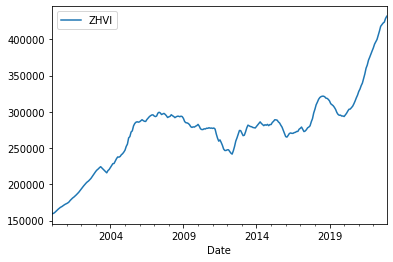

In [ ]:
df_interp[df_interp['ZipCode'] == '01341'].loc[:,['Date','ZHVI']].set_index('Date').plot();

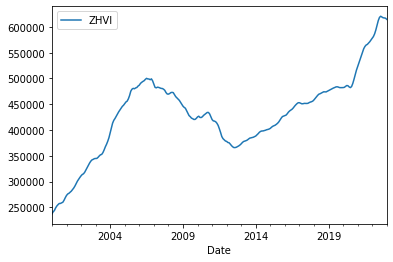

In [ ]:
df[df['ZipCode'] == '10516'].loc[:,['Date','ZHVI']].set_index('Date').plot();

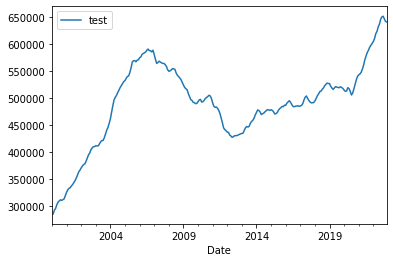

In [ ]:
df[df['ZipCode'] == '10516'].loc[:,['Date','test']].set_index('Date').plot();